Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape: (1620, 7)


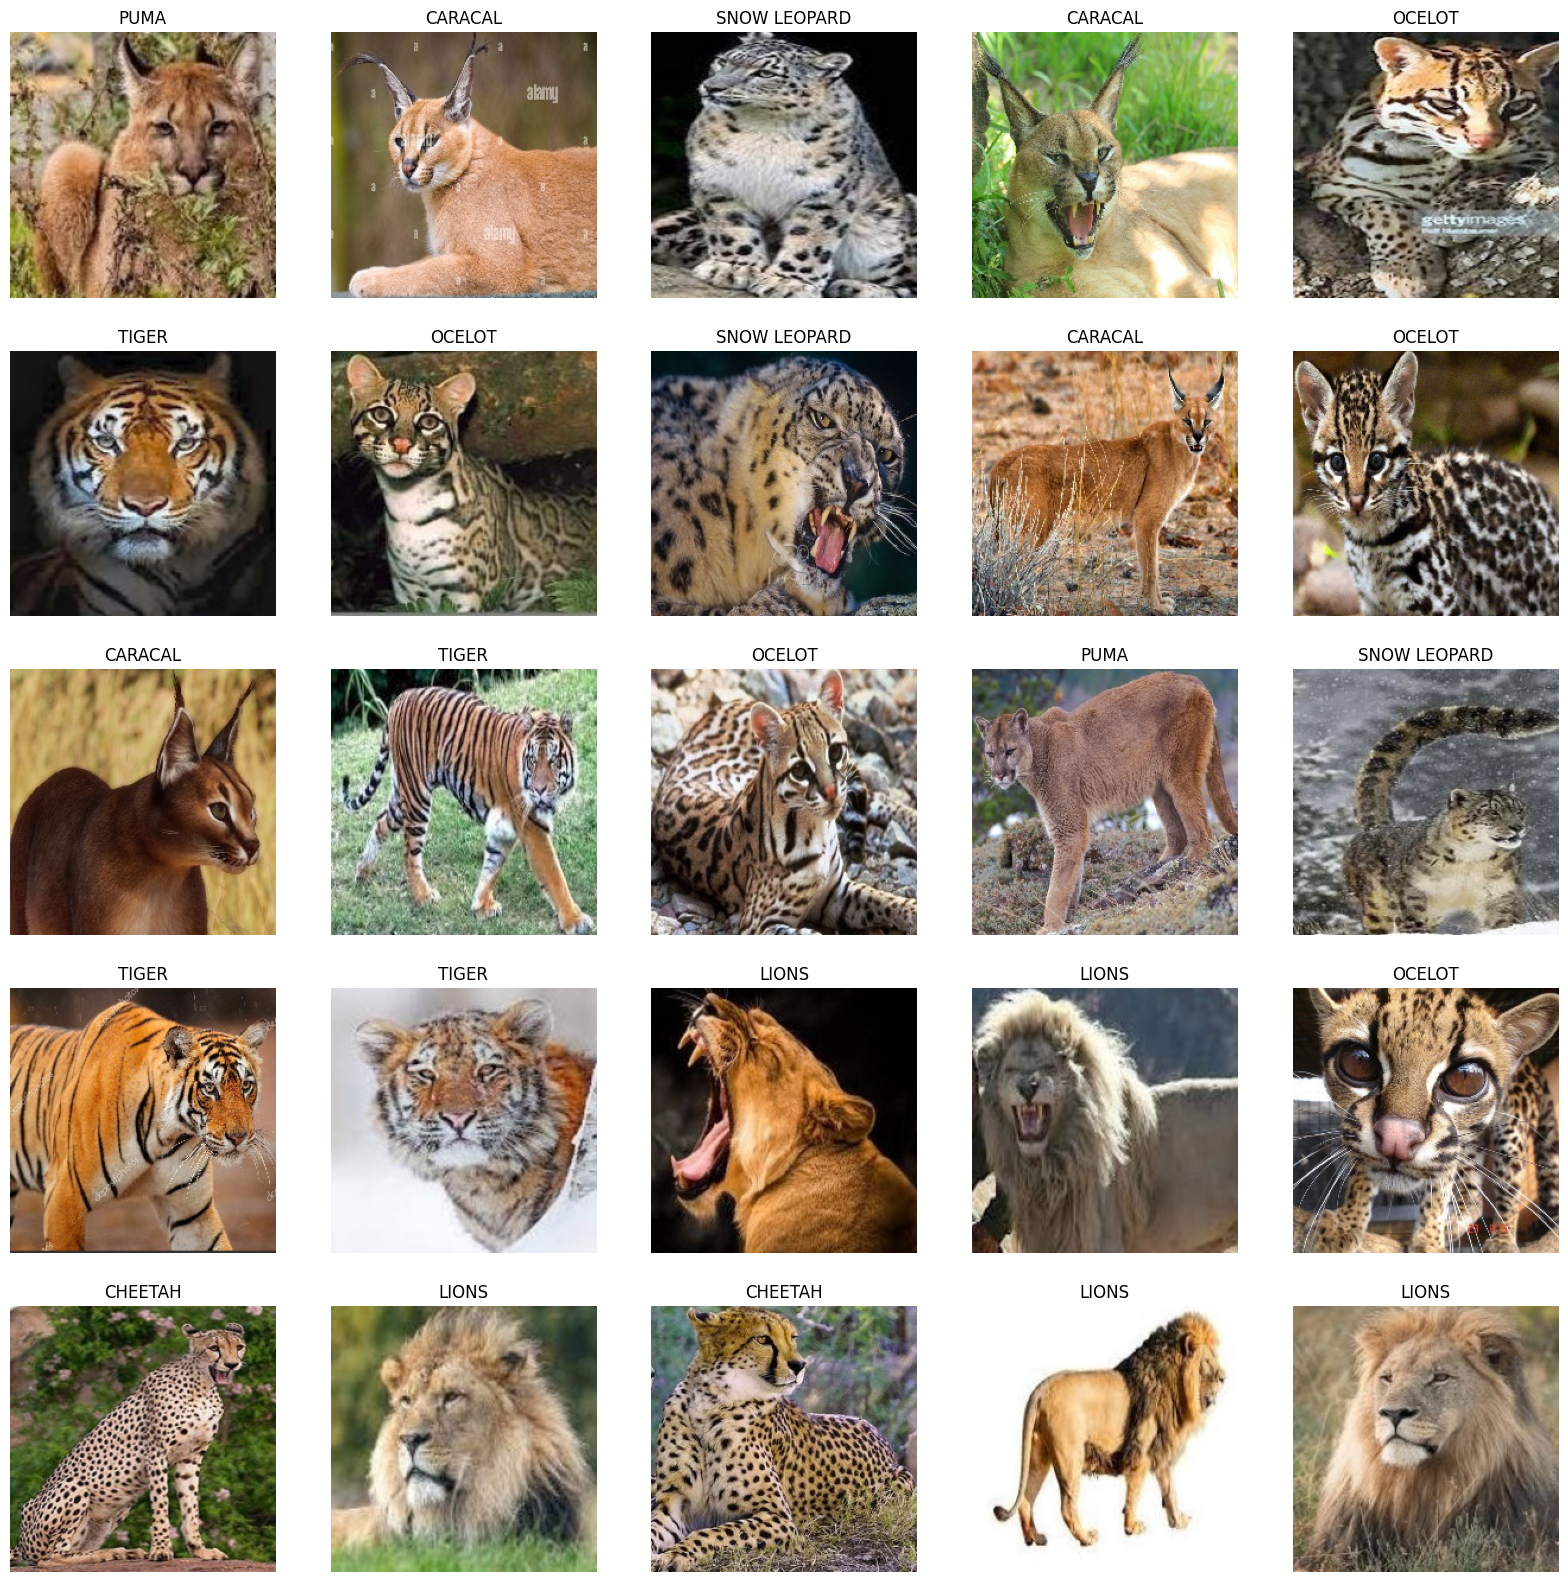

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import save_model, load_model

def load_imgs(path, folders):
    imgs = []
    labels = []
    n_imgs = 0
    for c in folders:
        # iterate over all the files in the folder
        for f in os.listdir(os.path.join(path, c)):
            if not f.endswith('.jpg'):
                continue
            # load the image (here you might want to resize the img to save memory)
            im = Image.open(os.path.join(path, c, f)).copy()
            imgs.append(im)
            labels.append(c)
        print('Loaded {} images of class {}'.format(len(imgs) - n_imgs, c))
        n_imgs = len(imgs)
    print('Loaded {} images total.'.format(n_imgs))
    return imgs, labels

def plot_sample(imgs, labels, nrows=4, ncols=4, resize=None):
    # create a grid of images
    fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    # take a random sample of images
    indices = np.random.choice(len(imgs), size=nrows*ncols, replace=False)
    for ax, idx in zip(axs.reshape(-1), indices):
        ax.axis('off')
        # sample an image
        ax.set_title(labels[idx])
        im = imgs[idx]
        if isinstance(im, np.ndarray):
            im = Image.fromarray(im)  
        if resize is not None:
            im = im.resize(resize)
        ax.imshow(im, cmap='gray')


# map class -> idx
label_to_idx = {
    'CHEETAH':0,
    'OCELOT': 1,
    'SNOW LEOPARD':2, 
    'CARACAL':3,
    'LIONS': 4,
    'PUMA': 5,
    'TIGER':6
}

idx_to_label = {
    0:'CHEETAH',
    1:'OCELOT',
    2:'SNOW LEOPARD', 
    3:'CARACAL',
    4:'LIONS',
    5:'PUMA',
    6:'TIGER'
}

def make_dataset(imgs, labels, label_map, img_size):
    x = []
    y = []
    n_classes = len(list(label_map.keys()))
    for im, l in zip(imgs, labels):
        # preprocess img
        x_i = im.resize(img_size)
        x_i = np.asarray(x_i)
        
        # encode label
        y_i = np.zeros(n_classes)
        y_i[label_map[l]] = 1.
        
        x.append(x_i)
        y.append(y_i)
    return np.array(x).astype('float32'), np.array(y)




def save_keras_model(model, filename):
    """
    Saves a Keras model to disk.
    Example of usage:

    >>> model = Sequential()
    >>> model.add(Dense(...))
    >>> model.compile(...)
    >>> model.fit(...)
    >>> save_keras_model(model, 'my_model.h5')

    :param model: the model to save;
    :param filename: string, path to the file in which to store the model.
    :return: the model.
    """
    save_model(model, filename)


def load_keras_model(filename):
    """
    Loads a compiled Keras model saved with models.save_model.

    :param filename: string, path to the file storing the model.
    :return: the model.
    """
    model = load_model(filename)
    return model

# Import libraries
import sys, os

from google.colab import drive
drive.mount("/content/drive/")

# Download the dataset
image_path =  '/content/drive/MyDrive/Wild Cats Dataset'
sys.path.append(image_path)


imgs, labels = load_imgs(image_path, ['CHEETAH', 'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = make_dataset(imgs, labels, label_to_idx, (224, 224))
print('x shape: {}, y shape: {}'.format(x.shape, y.shape))
plot_sample(imgs, labels, 5, 5, resize=(224, 224))



Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                9633856   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 9,636,167
Trainable params: 9,636,167
Non-trainable params: 0
_________________________________________________________________


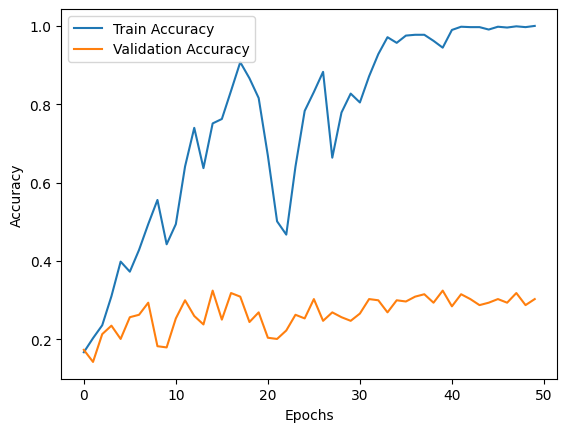

Test accuracy: 0.3117283880710602
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#TASK 1
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
imgs, labels = load_imgs(image_path, ['CHEETAH', 'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = make_dataset(imgs, labels, label_to_idx, (224, 224))

# Normalize the pixel values
x_normalized = x / 255

# Flatten the images into 1D vectors
x_flattened = tf.reshape(x_normalized, (x_normalized.shape[0], -1)).numpy()

# Split the data into train, validation, and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x_flattened, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

# Build the model
tf.random.set_seed(0)

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_flattened.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

model.summary()

# Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=32, verbose=0)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test,verbose=0)
print('Test accuracy:', test_accuracy)

from google.colab import drive
drive.mount('/content/drive')

# specify the path to your google drive
model_path = "/content/drive/MyDrive/machine_learning_2/model_T1.h5"

# save the model
model.save(model_path)



In [ ]:
#TASK 1 BONUS 

# Normalize the pixel values
x_normalized = x / 255

def extract_features(imgs):
    features = []
    for img in imgs:
        r_mean, g_mean, b_mean = np.mean(img, axis=(0, 1))
        r_var, g_var, b_var = np.var(img, axis=(0, 1))
        features.append([r_mean, g_mean, b_mean, r_var, g_var, b_var])
    return np.array(features)

# Extract features from the images
x_features = extract_features(x_normalized)

# Split the data into train, validation, and test sets
x_train_val_f, x_test_f, y_train_val_f, y_test_f = train_test_split(x_features, y, test_size=0.2, random_state=42)
x_train_f, x_val_f, y_train_f, y_val_f = train_test_split(x_train_val_f, y_train_val_f, test_size=0.25, random_state=42)

# Build the model
tf.random.set_seed(0)
model_features = Sequential([
    Dense(64, activation='relu', input_shape=(x_features.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

model_features.summary()

# Compile and train the model
model_features.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                       loss=tf.keras.losses.CategoricalCrossentropy(),
                       metrics=['accuracy'])
history_features = model_features.fit(x_train_f, y_train_f, validation_data=(x_val_f, y_val_f), epochs=50, batch_size=32, verbose=0)

# Plot the training and validation accuracy
plt.plot(history_features.history['accuracy'], label='Train Accuracy')
plt.plot(history_features.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss_features, test_accuracy_features = model_features.evaluate(x_test_f, y_test_f, verbose=0)
print('Test accuracy (features):', test_accuracy_features)

from google.colab import drive
drive.mount('/content/drive')

# specify the path to your google drive
model_path = "/content/drive/MyDrive/machine_learning_2/model_T1_BONUS.h5"

# save the model
model.save(model_path)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 2,759
Trainable params: 2,759
Non-trainable params: 0
_________________________________________________________________


Test accuracy (features): 0.3055555522441864
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#TASK 2
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping

# Load and preprocess the data
path = '/content/drive/MyDrive/Wild Cats Dataset'
folders = ["CHEETAH", "OCELOT", "SNOW LEOPARD", "CARACAL", "LIONS", "PUMA", "TIGER"]
imgs, labels = load_imgs(path, folders)
x, y = make_dataset(imgs, labels, label_to_idx, img_size=(224, 224))

# Normalize the pixel values
x /= 255.0

# Split the data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
loss = categorical_crossentropy
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Apply data augmentation techniques
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

data_gen.fit(x_train)

# Train and validate the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(data_gen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping],
                    epochs=100, verbose=0)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: ", test_acc)

# Assess the model's performance
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=folders))

from google.colab import drive
drive.mount('/content/drive')

# specify the path to your google drive
model_path = "/content/drive/MyDrive/machine_learning_2/model_T2.h5"

# save the model
model.save(model_path)



Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
Test accuracy:  0.790123462677002
11/11 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

     CHEETAH       0.80      0.96      0.87        47
      OCELOT       0.79      0.82      0.81        56
SNOW LEOPARD       0.91      0.93      0.92        56
     CARACAL       0.72      0.78      0.75        36
       LIONS       0.67      0.60      0.63        40
        PUMA       0.61      0.51      0.55        45
       TIGER       0.95      0.86      0.90        44

    accuracy                           0.79       324
   macro avg       0.78      0.78      0.78       324
weighted avg       0.79      0.79      0.79       324

Drive already mounted at /content/drive; to att

In [3]:
#TASK 2 BONUS 
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping
import sys, os
from google.colab import drive

drive.mount("/content/drive/")

# Download the dataset
image_path =  '/content/drive/MyDrive/Wild Cats Dataset'
sys.path.append(image_path)

imgs, labels = load_imgs(image_path, ['CHEETAH', 'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = make_dataset(imgs, labels, label_to_idx, (224, 224))

# Normalize the pixel values
x /= 255.0

# Split the data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Define grid search parameters
learning_rates = [1e-3, 1e-4, 1e-5]
dropout_rates = [0.1, 0.25, 0.5]

# To store models and their corresponding validation accuracy
models = []
validation_acc = []

for lr in learning_rates:
    for dr in dropout_rates:
        # Define the model
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(dr))
        model.add(Dense(7, activation='softmax'))

        # Compile the model
        model.compile(optimizer=Adam(lr), loss=categorical_crossentropy, metrics=['accuracy'])

        # Fit the model
        history = model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=30)
        
        # Get the best validation accuracy for this model
        best_val_acc = max(history.history['val_accuracy'])
        
        # Store the model and its corresponding best validation accuracy
        models.append(model)
        validation_acc.append(best_val_acc)

# Find the model with the best validation accuracy
best_model_index = np.argmax(validation_acc)
best_model = models[best_model_index]

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print("Best model test accuracy: ", test_acc)

from google.colab import drive
drive.mount('/content/drive')

# specify the path to your google drive
model_path = "/content/drive/MyDrive/machine_learning_2/model_T2_BONUS.h5"

# save the model
model.save(model_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
Epoch 1/30
31/31 [==============================] - 11s 75ms/step - loss: 1.9447 - accuracy: 0.2099 - val_loss: 1.9424 - val_accuracy: 0.1790
Epoch 2/30
31/31 [==============================] - 1s 46ms/step - loss: 1.6693 - accuracy: 0.3663 - val_loss: 1.5653 - val_accuracy: 0.4043
Epoch 3/30
31/31 [==============================] - 1s 41ms/step - loss: 1.3246 - accuracy: 0.4979 - val_loss: 1.3980 - val_accuracy: 0.4537
Epoch 4/30
31/31 [==============================] - 1s 46ms/step - loss: 1.0972 - accuracy: 0.6091 - val_loss: 1.1877 - val_accuracy: 0.5247
Epoch 5/30
31/31 [==================